In [ ]:
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPool2D
from keras import backend as K
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
#!pip install -U git+https://github.com/qubvel/efficientnet
#import efficientnet.keras as enet
from keras.utils.np_utils import to_categorical
import pandas as pd


In [ ]:
#!pip install h5py==2.10.0

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import load_img
import glob
data=[]
labels=[]
bkl = glob.glob('/content/gdrive/MyDrive/3class_dataset/train/bkl/*.jpg')
mel= glob.glob('/content/gdrive/MyDrive/3class_dataset/train/mel/*.jpg')
nv = glob.glob('/content/gdrive/MyDrive/3class_dataset/train/nv/*.jpg')




In [ ]:
for i in bkl:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)

for i in mel:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
  
for i in nv:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)



In [ ]:


bkl1 = glob.glob('/content/gdrive/MyDrive/3class_dataset/test/bkl/*.jpg')
mel1= glob.glob('/content/gdrive/MyDrive/3class_dataset/test/mel/*.jpg')
nv1 = glob.glob('/content/gdrive/MyDrive/3class_dataset/test/nv/*.jpg')

for i in bkl1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(0)

In [ ]:
for i in mel1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(1)
for i in nv1:
  image=load_img(i, target_size= (224,224)) 
  image=np.asarray(image)
  data.append(image)
  labels.append(2)

In [ ]:
df=pd.DataFrame({'data':data,'labels':labels})
df2 = df.sample(frac = 1)
data1=np.asarray(df2.iloc[:,0].tolist())
labels1=np.asarray(df2.iloc[:,1].tolist())

In [ ]:
from keras.utils.np_utils import to_categorical
#y_test=data1
cat_labels = to_categorical(labels1, num_classes=3)
data1=data1/255
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1, cat_labels, test_size=0.25, random_state=250)
x_train.shape


(3375, 224, 224, 3)

In [ ]:
y_test.shape

(1125, 3)

In [ ]:
from keras import Model
from keras.applications. import preprocess_input,ResNet50

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop
optimizer='rmsprop'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    
    input_shape=(224,224,3))

   

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
model1 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False





In [ ]:
# compile the model (should be done after setting layers to non-trainable)
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

hist=model1.fit_generator(dataAugmentaion.flow(x_train, y_train, batch_size = 32),
 validation_data = (x_test, y_test), steps_per_epoch = len(x_train) // 32,
 epochs = 50)

Epoch 1/50
105/105 [==============================] - 35s 328ms/step - loss: 0.9499 - accuracy: 0.5271 - val_loss: 0.9594 - val_accuracy: 0.5458
Epoch 2/50
105/105 [==============================] - 33s 311ms/step - loss: 0.9460 - accuracy: 0.5328 - val_loss: 1.1223 - val_accuracy: 0.3760
Epoch 3/50
105/105 [==============================] - 33s 309ms/step - loss: 0.9366 - accuracy: 0.5372 - val_loss: 0.9018 - val_accuracy: 0.5778
Epoch 4/50
105/105 [==============================] - 33s 310ms/step - loss: 0.9460 - accuracy: 0.5229 - val_loss: 0.9790 - val_accuracy: 0.5298
Epoch 5/50
105/105 [==============================] - 33s 310ms/step - loss: 0.9413 - accuracy: 0.5348 - val_loss: 0.8993 - val_accuracy: 0.5413
Epoch 6/50
105/105 [==============================] - 33s 312ms/step - loss: 0.9446 - accuracy: 0.5325 - val_loss: 0.9092 - val_accuracy: 0.5289
Epoch 7/50
105/105 [==============================] - 32s 308ms/step - loss: 0.9414 - accuracy: 0.5393 - val_loss: 0.8863 - val_ac

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

<Figure size 432x432 with 0 Axes>

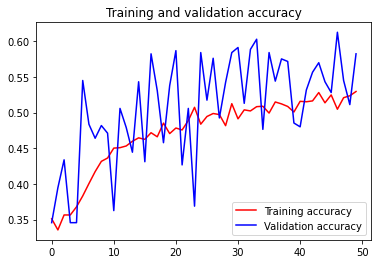

<Figure size 432x432 with 0 Axes>

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

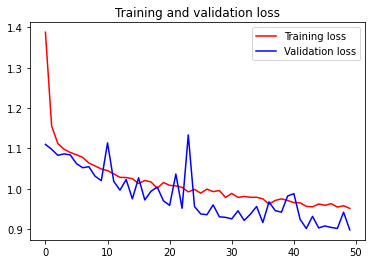

<Figure size 432x432 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

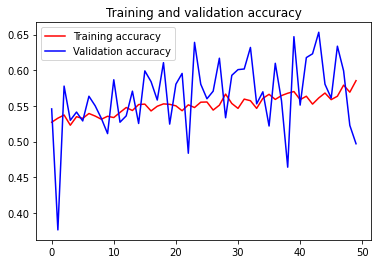

<Figure size 432x432 with 0 Axes>

In [ ]:
#FOR 100 EPOCHS
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

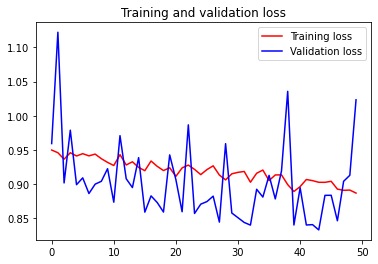

<Figure size 432x432 with 0 Axes>

In [ ]:
#FOR 100 EPOCHS
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

In [ ]:
#  batch_size = 15

# epochs =20



# history = model.fit(

#     x_train,y_train,

#     epochs=epochs,

#     batch_size = batch_size,

#     validation_data=(x_test,y_test),

#     verbose=2)

Epoch 1/20
225/225 - 40s - loss: 0.9736 - accuracy: 0.5938 - val_loss: 1.4033 - val_accuracy: 0.3156 - 40s/epoch - 178ms/step
Epoch 2/20
225/225 - 21s - loss: 0.8351 - accuracy: 0.6459 - val_loss: 1.1132 - val_accuracy: 0.4596 - 21s/epoch - 93ms/step
Epoch 3/20
225/225 - 21s - loss: 0.7781 - accuracy: 0.6836 - val_loss: 1.9766 - val_accuracy: 0.6738 - 21s/epoch - 93ms/step
Epoch 4/20
225/225 - 21s - loss: 0.7296 - accuracy: 0.6880 - val_loss: 0.8138 - val_accuracy: 0.6853 - 21s/epoch - 93ms/step
Epoch 5/20
225/225 - 21s - loss: 0.7151 - accuracy: 0.6927 - val_loss: 1.0849 - val_accuracy: 0.6258 - 21s/epoch - 93ms/step
Epoch 6/20
225/225 - 21s - loss: 0.7095 - accuracy: 0.6996 - val_loss: 1.1014 - val_accuracy: 0.5013 - 21s/epoch - 92ms/step
Epoch 7/20
225/225 - 21s - loss: 0.7185 - accuracy: 0.6951 - val_loss: 0.8726 - val_accuracy: 0.6071 - 21s/epoch - 92ms/step
Epoch 8/20
225/225 - 21s - loss: 0.6872 - accuracy: 0.7007 - val_loss: 0.7837 - val_accuracy: 0.6196 - 21s/epoch - 93ms/step

KeyboardInterrupt: ignored

In [ ]:
model1=load_model('model_3_class.h5')

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="/content/path/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call_backs=[checkpoint]

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.83556, saving model to /content/path/weights-improvement-01-0.84.hdf5
68/68 - 25s - loss: 0.3794 - accuracy: 0.8397 - val_loss: 0.3968 - val_accuracy: 0.8356 - 25s/epoch - 371ms/step
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3654 - accuracy: 0.8519 - val_loss: 0.4655 - val_accuracy: 0.8231 - 24s/epoch - 356ms/step
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3639 - accuracy: 0.8527 - val_loss: 0.4526 - val_accuracy: 0.8338 - 24s/epoch - 355ms/step
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3501 - accuracy: 0.8569 - val_loss: 0.4665 - val_accuracy: 0.8169 - 24s/epoch - 354ms/step
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.83556
68/68 - 24s - loss: 0.3595 - accuracy: 0.8542 - val_loss: 0.5019 - val_accuracy: 0.8151 - 24s/epoch - 356ms/step
Epoch 6/30

Epoch 6: val_accuracy did not improve from 

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

<Figure size 432x432 with 0 Axes>

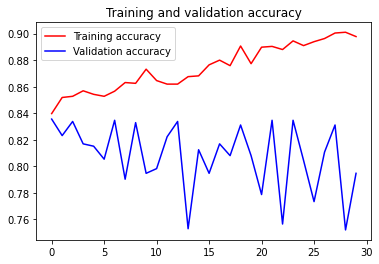

<Figure size 432x432 with 0 Axes>

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

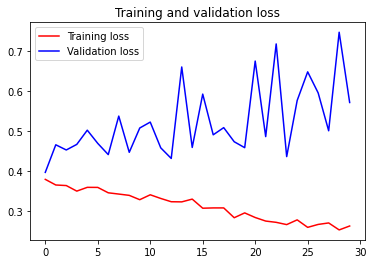

<Figure size 432x432 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure(figsize=(6,6))